In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
traindataset=pd.read_csv('train.txt',sep=" ",header=None)
train=traindataset.to_numpy();
#print(train)
testdataset=pd.read_csv('test.txt',sep=" ",header=None)
#print(testdataset)
test=testdataset.to_numpy();

In [35]:
Trainclass1 =[([i[0],i[1]]) for i in train if i[2] == 1]
Trainclass2 =[([i[0],i[1]]) for i in train if i[2] == 2]
Trainclass1 = np.array(Trainclass1)
Trainclass2 = np.array(Trainclass2)
#print('TrainClass 1: ',Trainclass1)
#print('TrainClass 2: ',Trainclass2)

In [36]:
testVal =[(i[0],i[1]) for i in test]
testClass = [i[2] for i in test]

testVal=np.array(testVal)
testClass=np.array(testClass)

#print('Test Values: ',testVal)
print('Test class',testClass)

Test class [1 1 2 1 1 1 2]


In [37]:
sum_X_Class1 = 0
sum_Y_Class1 = 0

for i in Trainclass1:
    sum_X_Class1,sum_Y_Class1 = (sum_X_Class1 + i[0]),(sum_Y_Class1 + i[1])

#print(sum_X_Class1)
#print(sum_Y_Class1)
meanclass1 = [sum_X_Class1/len(Trainclass1), sum_Y_Class1/len(Trainclass1)]
meanclass1=np.array(meanclass1)
sum_X_Class2 = 0
sum_Y_Class2 = 0
for i in Trainclass2:
    sum_X_Class2,sum_Y_Class2 = (sum_X_Class2 + i[0]),(sum_Y_Class2 + i[1])
    
meanclass2 = [sum_X_Class2/len(Trainclass2), sum_Y_Class2/len(Trainclass2)]
meanclass2=np.array(meanclass2)
#print(meanclass2)

In [44]:
predtn1 = np.zeros(7)
predtn2 = np.zeros(7)
predclass = np.zeros(7)
temp = np.zeros((7,3))
#print(predtn1,predtn2,predclass,temp)

for i in range(len(testVal)): 
    predtn1[i]=np.dot(meanclass1.T, testVal[i]) - 0.5*np.dot(meanclass1.T,meanclass1)
   # print(predtn1)
    predtn2[i]=np.dot(meanclass2.T,testVal[i]) - 0.5*np.dot(meanclass2.T,meanclass2)
   # print(predtn2)
    if(predtn1[i]<predtn2[i]):
        temp[i][0],temp[i][1],temp[i][2],predclass[i] = testVal[i][0],testVal[i][1],2,2
        #print(temp[i]) 
        
    else:
        temp[i][0],temp[i][1],temp[i][2],predclass[i] = testVal[i][0],testVal[i][1],1,1
        #print(temp[i])
    
print(predclass)
#print(temp)    

In [45]:
class1=[[i[0],i[1]] for i in temp if i[2]==1]
class2=[[i[0],i[1]] for i in temp if i[2]==2]

class1=np.array(class1)
class2=np.array(class2)
#print(class1,class2)


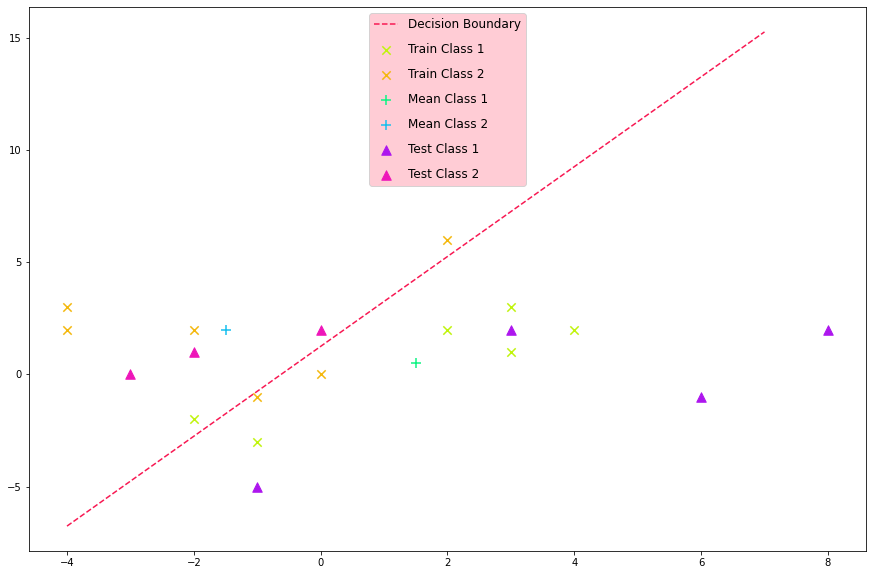

In [40]:
X = np.zeros(12)
Y = np.zeros(12)
point = 0
for x in range(-4,8,1):
    y = -((meanclass1[0]-meanclass2[0])*x - 0.5 * 
          np.dot(meanclass1.T,meanclass1)+0.5*np.dot(meanclass2.T,meanclass2))/(meanclass1[1]-meanclass2[1])
    #print (y)
    X[point] = x
    Y[point] = y
    point= point + 1  
#print(X,Y)
fig, axis = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(15)

#decision boundary ploting
axis.plot(X,Y,"--",label='Decision Boundary',color='#F81852')

#scatting train values
axis.scatter(Trainclass1[:,0],Trainclass1[:,1],marker='x',color='#C0F40D',s=70,label='Train Class 1')
axis.scatter(Trainclass2[:,0],Trainclass2[:,1],marker='x',color='#F4B80D',s=70,label='Train Class 2')

#scatting mean values
axis.scatter(meanclass1[0],meanclass1[1],marker='+',color='#0DF483', s=90, label='Mean Class 1')
axis.scatter(meanclass2[0],meanclass2[1],marker='+',color='#16BFEE',s=90,label='Mean Class 2')

#scatting test values
axis.scatter(class1[:,0],class1[:,1],marker='^',color='#AD16EE',s=90,label='Test Class 1')
axis.scatter(class2[:,0],class2[:,1],marker='^',color='#EE16B9',s=90,label='Test Class 2')

#labeling decoration 
legend = axis.legend(loc='upper center',fontsize='large',labelspacing=1.0)
legend.get_frame().set_facecolor('pink')


In [41]:
#Accuracy
acc = 0
acc = [acc+1 for m,n in zip(testClass,predclass) if m == n]
accuracy = sum(acc)/len(testClass) *100
print(format(accuracy,'.2f'),'%')

85.71 %
